# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [47]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]
X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
Y = Y.reshape(-1, 1)

eps = 0.0001
koef = 0.0000001

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `numpy` и `matplotlib`.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [48]:
def func_to_min(X, Y, theta, alpha):
    return np.sum((X @ theta - Y) ** 2) + alpha * np.sum(theta ** 2)


def func_grad(X, Y, theta, alpha):
    return ((X @ theta - Y).T @ X).T + alpha * theta


def gcd(X, Y, alpha, koef, eps):
    theta = np.ones((X.shape[1], 1))
    Qs = []
    while True:
        Q = func_to_min(X, Y, theta, alpha)
        Qs.append(Q)
        step = koef*(func_grad(X, Y, theta, alpha))  
        if np.linalg.norm(step) < eps:
            break
        theta -= step   
    return theta, Q, Qs     


Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации  α, используя полные данные для обучения и для тестирования.

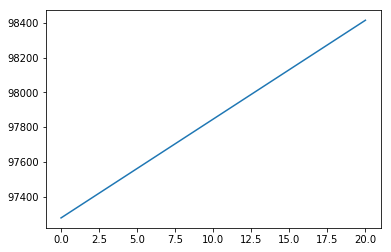

In [49]:

alphas = np.linspace(0, 20, 100)
Qs = [gcd(X, Y, alpha, koef, eps)[1] for alpha in alphas]

plt.plot(alphas, Qs)

2. Подготовьте исходные данные для 5 fold CV.

In [51]:
def KFold(data, n=5):
    data = np.concatenate((np.ones((data.shape[0], 1)), data), 1)
    np.take(data,np.random.permutation(data.shape[0]),axis=0,out=data)
    splits = np.split(data, n)
    for k in range(n):
        X_test, y_test = splits[k][:, :-1], splits[k][:, -1]
        train = np.concatenate(np.delete(splits, k, 0))
        X_train, y_train = train[:, :-1], train[:, -1]
        yield X_train, X_test, y_train.reshape((-1,1)), y_test.reshape((-1,1))
        

С помощью CV найдите оптимальное значение  α  на какой-нибудь сетке значений.

In [52]:
def search_optim_value(alphas):
    Alpha, Score = 0, np.inf
    scores = [0]*len(alphas)
    for X_train, X_test, y_train, y_test in KFold(D):
        for i, alpha in enumerate(alphas):
            theta = gcd(X_train, y_train, alpha, koef, eps)[0] 
            score = func_to_min(X_test, y_test, theta, alpha)
            scores[i] += score
            if score < Score:
                Alpha = alpha
                Score = score
    return Alpha, Score, [score/5 for score in scores] 
    
    

In [53]:
alphas = np.linspace(0, 20, 100)
alpha, score, scores = search_optim_value(alphas)
print("alpha = {}, loss = {}".format(alpha, score))

alpha = 0.0, loss = 17526.09847141287


Постройте валидационную кривую.

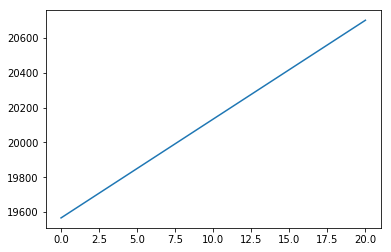

In [54]:
plt.plot(alphas, scores)

Постройте кривую обучения.

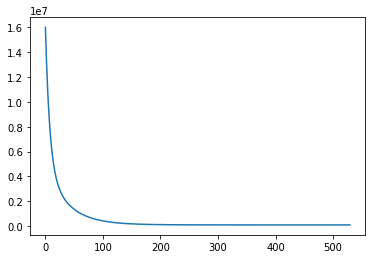

In [55]:
Qs = gcd(X, Y, alpha, koef, eps)[2]
plt.plot(np.arange(len(Qs)), Qs)